In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import RandomOverSampler,SMOTE

# 1. Import dataset

In [239]:
df = pd.read_csv("./data/earthquake_1995-2023.csv")

In [240]:
# view summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

# 2. Clean

In [241]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [242]:
# check null values
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [243]:
# check duplicate
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [title, magnitude, date_time, cdi, mmi, alert, tsunami, sig, net, nst, dmin, gap, magType, depth, latitude, longitude, location, continent, country]
Index: []


In [244]:
df[df['location'].isna()]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
30,M 6.8 -,6.8,20-01-2023 22:09,4,3,green,0,718,us,60,5.129,61.0,mww,610.671,-26.7209,-63.0394,NaN,South America,Argentina
37,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
39,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
54,M 6.9 -,6.9,19-05-2022 10:13,2,5,green,1,733,us,127,0.371,45.0,mww,10.000,-54.1325,159.0270,NaN,NaN,NaN
103,M 6.9 -,6.9,01-05-2021 01:27,7,6,green,1,919,us,0,2.619,35.0,mww,43.000,38.2296,141.6650,NaN,Asia,Japan
281,M 6.9 -,6.9,28-05-2016 05:38,3,3,green,1,733,us,0,5.485,19.0,mww,405.690,-21.9724,-178.2040,NaN,NaN,NaN


I think the alert may not be important since we already has magnitude data \
This also apply to title \
Also the location, continent and country also applies since we have latitude and longitude \
Drop time also

In [245]:
columns_to_drop = ['title', 'alert', 'location', 'continent', 'country', 'date_time']
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(inplace=True)

In [246]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [247]:
df['net'].value_counts()
# most data are by us, so drop net

net
us          960
ak           13
official      9
at            3
ci            3
nc            3
duputel       3
pt            2
hv            2
nn            1
uw            1
Name: count, dtype: int64

In [248]:
df.drop('net',axis=1,inplace=True)

In [249]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960


In [250]:
# view summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   magType    1000 non-null   object 
 9   depth      1000 non-null   float64
 10  latitude   1000 non-null   float64
 11  longitude  1000 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 93.9+ KB


# 3. EDA

tsunami
0    675
1    325
Name: count, dtype: int64


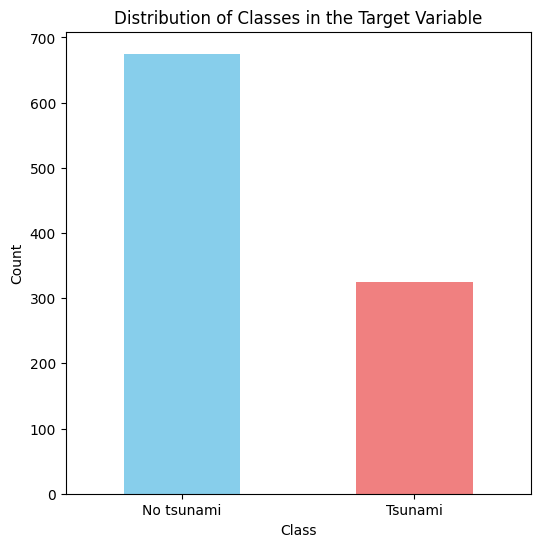

In [251]:
print(df['tsunami'].value_counts())
# plot the portion of each class in the target variable as bar chart
plt.figure(figsize=(6, 6))
df['tsunami'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Classes in the Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# Replace default x-axis labels with custom labels
plt.xticks([0, 1], ['No tsunami', 'Tsunami'], rotation=0)
plt.show()

In [252]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [253]:
# encode 
# magType is not an float or integer
# magType: The method or algorithm used to calculate the preferred magnitude for the event

In [254]:
obj_params = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj_params.append(col)


In [255]:
# Label Encoding
encoder = LabelEncoder()

for col in obj_params:
    df[col] = encoder.fit_transform(df[col])
df.head(5)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,8,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,8,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,8,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,8,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,0,21.000,54.4900,-160.7960


In [256]:
# # Scaling
# scale = StandardScaler()

# for col in obj_params:
#     df[[col]] = scale.fit_transform(df[[col]])
# df.head()

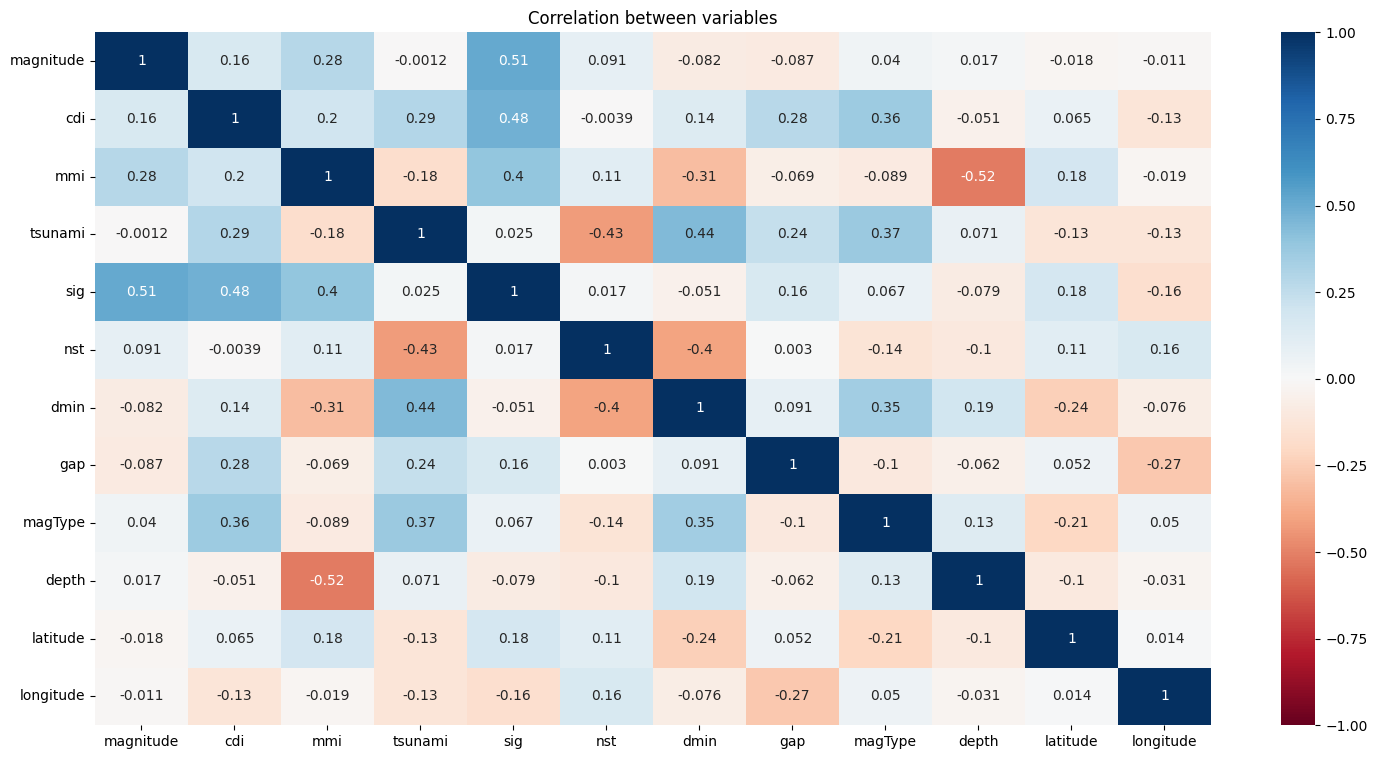

In [257]:
params = []
for col in df.columns:
    if df[col].dtype != 'object':
        params.append(col)
# plot a heatmap to check the correlation between the all attribute now are converted to floats
# for better grouping and interpretation,sort columns by the list of columns created above

plt.figure(figsize=(18, 9))
# normalize the color scale
sns.heatmap(df[params].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

In [258]:
# split the data into X and y
X = df.drop('tsunami', axis=1)
y = df['tsunami']

# split the data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

tsunami
0    548
1    252
Name: count, dtype: int64


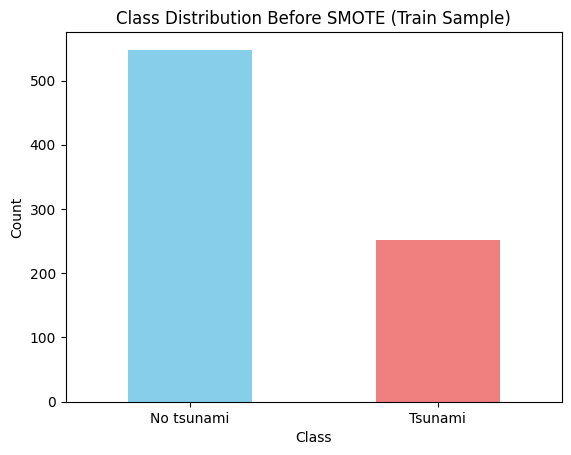

In [259]:
print(y_train.value_counts())
# plot the portion of each class in the target variable 
# this is our test
y_train.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution Before SMOTE (Train Sample)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# Replace default x-axis labels with custom labels
plt.xticks([0, 1], ['No tsunami', 'Tsunami'], rotation=0)
plt.show()

In [260]:
# Imbalanced sampling
sm=SMOTE()
X_train,y_train=sm.fit_resample(X_train,y_train)

tsunami
0    548
1    548
Name: count, dtype: int64


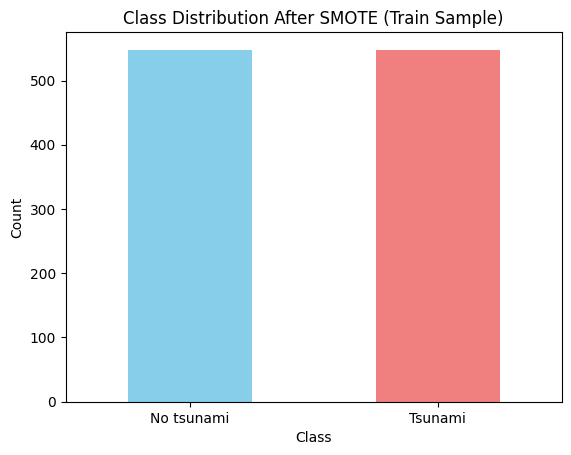

In [261]:
print(y_train.value_counts())
# plot the portion of each class in the target variable 
# this is our test
y_train.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution After SMOTE (Train Sample)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
# Replace default x-axis labels with custom labels
plt.xticks([0, 1], ['No tsunami', 'Tsunami'], rotation=0)
plt.show()

# 4. Model

In [262]:
# build a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [263]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_test)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_test, y_val_pred)],
                        'val_precision': [precision_score(y_test, y_val_pred)],
                        'val_recall': [recall_score(y_test, y_val_pred)],
                        'val_f1': [f1_score(y_test, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_test, y_val_pred)]})
    return df

In [264]:
# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

In [265]:
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.920,0.870130,0.917808,0.893333,0.919534,Decision Tree
6,0.978102,0.967857,0.989051,0.978339,0.978102,0.910,0.857143,0.904110,0.880000,0.908748,Gradient Boosting
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.905,0.855263,0.890411,0.872483,0.901898,Random Forest
5,0.862226,0.828099,0.914234,0.869037,0.862226,0.880,0.802469,0.890411,0.844156,0.882213,Naive Bayes
0,0.859489,0.828333,0.906934,0.865854,0.859489,0.875,0.792683,0.890411,0.838710,0.878276,Logistic Regression
3,0.882299,0.850921,0.927007,0.887336,0.882299,0.790,0.691358,0.767123,0.727273,0.785136,KNN
4,0.747263,0.678055,0.941606,0.788388,0.747263,0.710,0.567568,0.863014,0.684783,0.742530,SVM


# 6. Test

In [266]:
def test_models(model, x_train, x_test,y_train, y_test):
    
    model.fit(x_train, y_train)
    # predict the test set
    y_test_pred = model.predict(x_test)

    # print the classification report
    print(classification_report(y_test, y_test_pred))
    score = f"{model}'s accuracy score: \
    {accuracy_score(y_test, y_test_pred)}"

    print(score)

    print(y_test.value_counts())
    # plot the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel(f'Predicted \n {score}')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
    plt.yticks([0.5, 1.5], ['No Tsunami', 'Tsunami'])
    plt.title(f'Confusion matrix - {model}')
    
    plt.show()

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       127
           1       0.80      0.89      0.84        73

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.89      0.88      0.88       200

GaussianNB()'s accuracy score:     0.88
tsunami
0    127
1     73
Name: count, dtype: int64


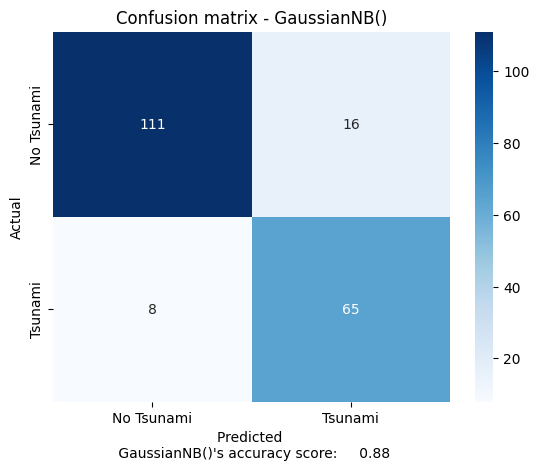

In [267]:
test_models(GaussianNB(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       127
           1       0.86      0.93      0.89        73

    accuracy                           0.92       200
   macro avg       0.91      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

DecisionTreeClassifier()'s accuracy score:     0.92
tsunami
0    127
1     73
Name: count, dtype: int64


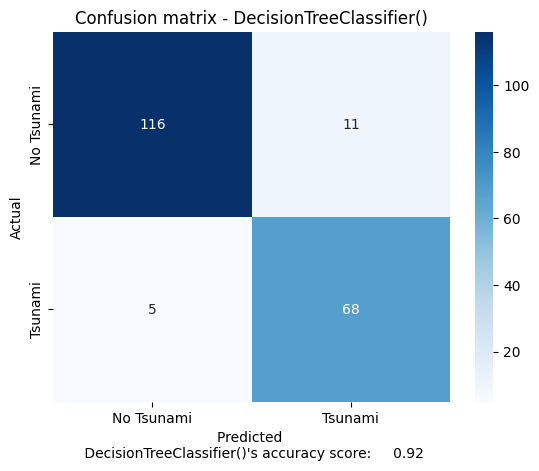

In [268]:
test_models(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.89      0.62      0.73       127
           1       0.57      0.86      0.68        73

    accuracy                           0.71       200
   macro avg       0.73      0.74      0.71       200
weighted avg       0.77      0.71      0.71       200

SVC()'s accuracy score:     0.71
tsunami
0    127
1     73
Name: count, dtype: int64


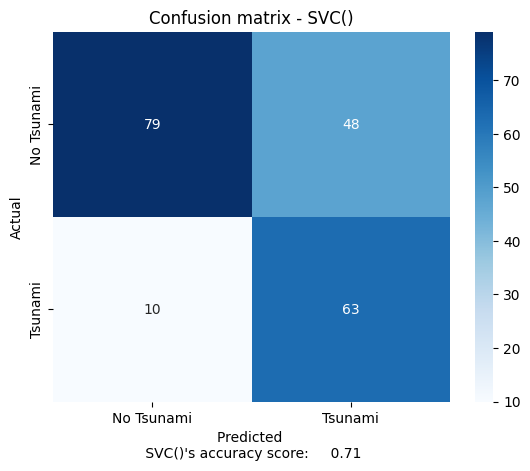

In [269]:

test_models(SVC(), X_train, X_test, y_train, y_test)

# 7. Hyperparameter Tuning

In [270]:
# Model:  Native Bayes
model_NB = GaussianNB()
params = {
        'priors': [None],
        'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
tuned = RandomizedSearchCV(model_NB, params, cv=5)
tuned.fit(X_train, y_train)
best_model = tuned.best_estimator_
print(f"{model_NB}")
print(f'Best hyperparameters: {tuned.best_params_}') 
print(f'Best training score: {tuned.best_score_}')
best_model = tuned.best_estimator_


GaussianNB()
Best hyperparameters: {'var_smoothing': 1e-05, 'priors': None}
Best training score: 0.8576504773765048


In [271]:
p = best_model.predict(X_test)  
print(classification_report(y_test,p))
score = (f"{model_NB} 's best test accuracy score: {accuracy_score(y_test, p)}")
print(score)


              precision    recall  f1-score   support

           0       0.93      0.86      0.89       127
           1       0.78      0.89      0.83        73

    accuracy                           0.87       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.88      0.87      0.87       200

GaussianNB() 's best test accuracy score: 0.87


In [272]:
# Model:  SVM
model_SVM = SVC()
params = {
        'C': [0.1, 1, 10, 100, 1000],  
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
        'kernel': ['rbf']
}
tuned = RandomizedSearchCV(model_SVM, params, cv=5)
tuned.fit(X_train, y_train)
print(tuned.best_params_)
print(tuned.best_score_)
best_model = tuned.best_estimator_

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
0.8932710668327106


In [273]:
p = best_model.predict(X_test)  
print(classification_report(y_test,p))
score = (f"{model_SVM} 's best accuracy score: {accuracy_score(y_test, p)}")
print(score)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       127
           1       0.78      0.70      0.74        73

    accuracy                           0.82       200
   macro avg       0.81      0.79      0.80       200
weighted avg       0.82      0.82      0.82       200

SVC() 's best accuracy score: 0.82


In [274]:
# Model:  Decision Tree
model_Tree = DecisionTreeClassifier()
params = {
        
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_split': [2, 6, 10],
        'min_samples_leaf': [1, 3, 4],
        'criterion': ["gini", "entropy"]
}
tuned = RandomizedSearchCV(model_Tree, params, cv=5)
tuned.fit(X_train, y_train)
print(tuned.best_params_)
print(tuned.best_score_)
best_model = tuned.best_estimator_

{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 40, 'criterion': 'gini'}
0.9160813615608137


In [275]:
p = best_model.predict(X_test)  
print(classification_report(y_test,p))
score = (f"{model_Tree} 's best accuracy score: {accuracy_score(y_test, p)}")
print(score)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       127
           1       0.86      0.96      0.91        73

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.93      0.93      0.93       200

DecisionTreeClassifier() 's best accuracy score: 0.93


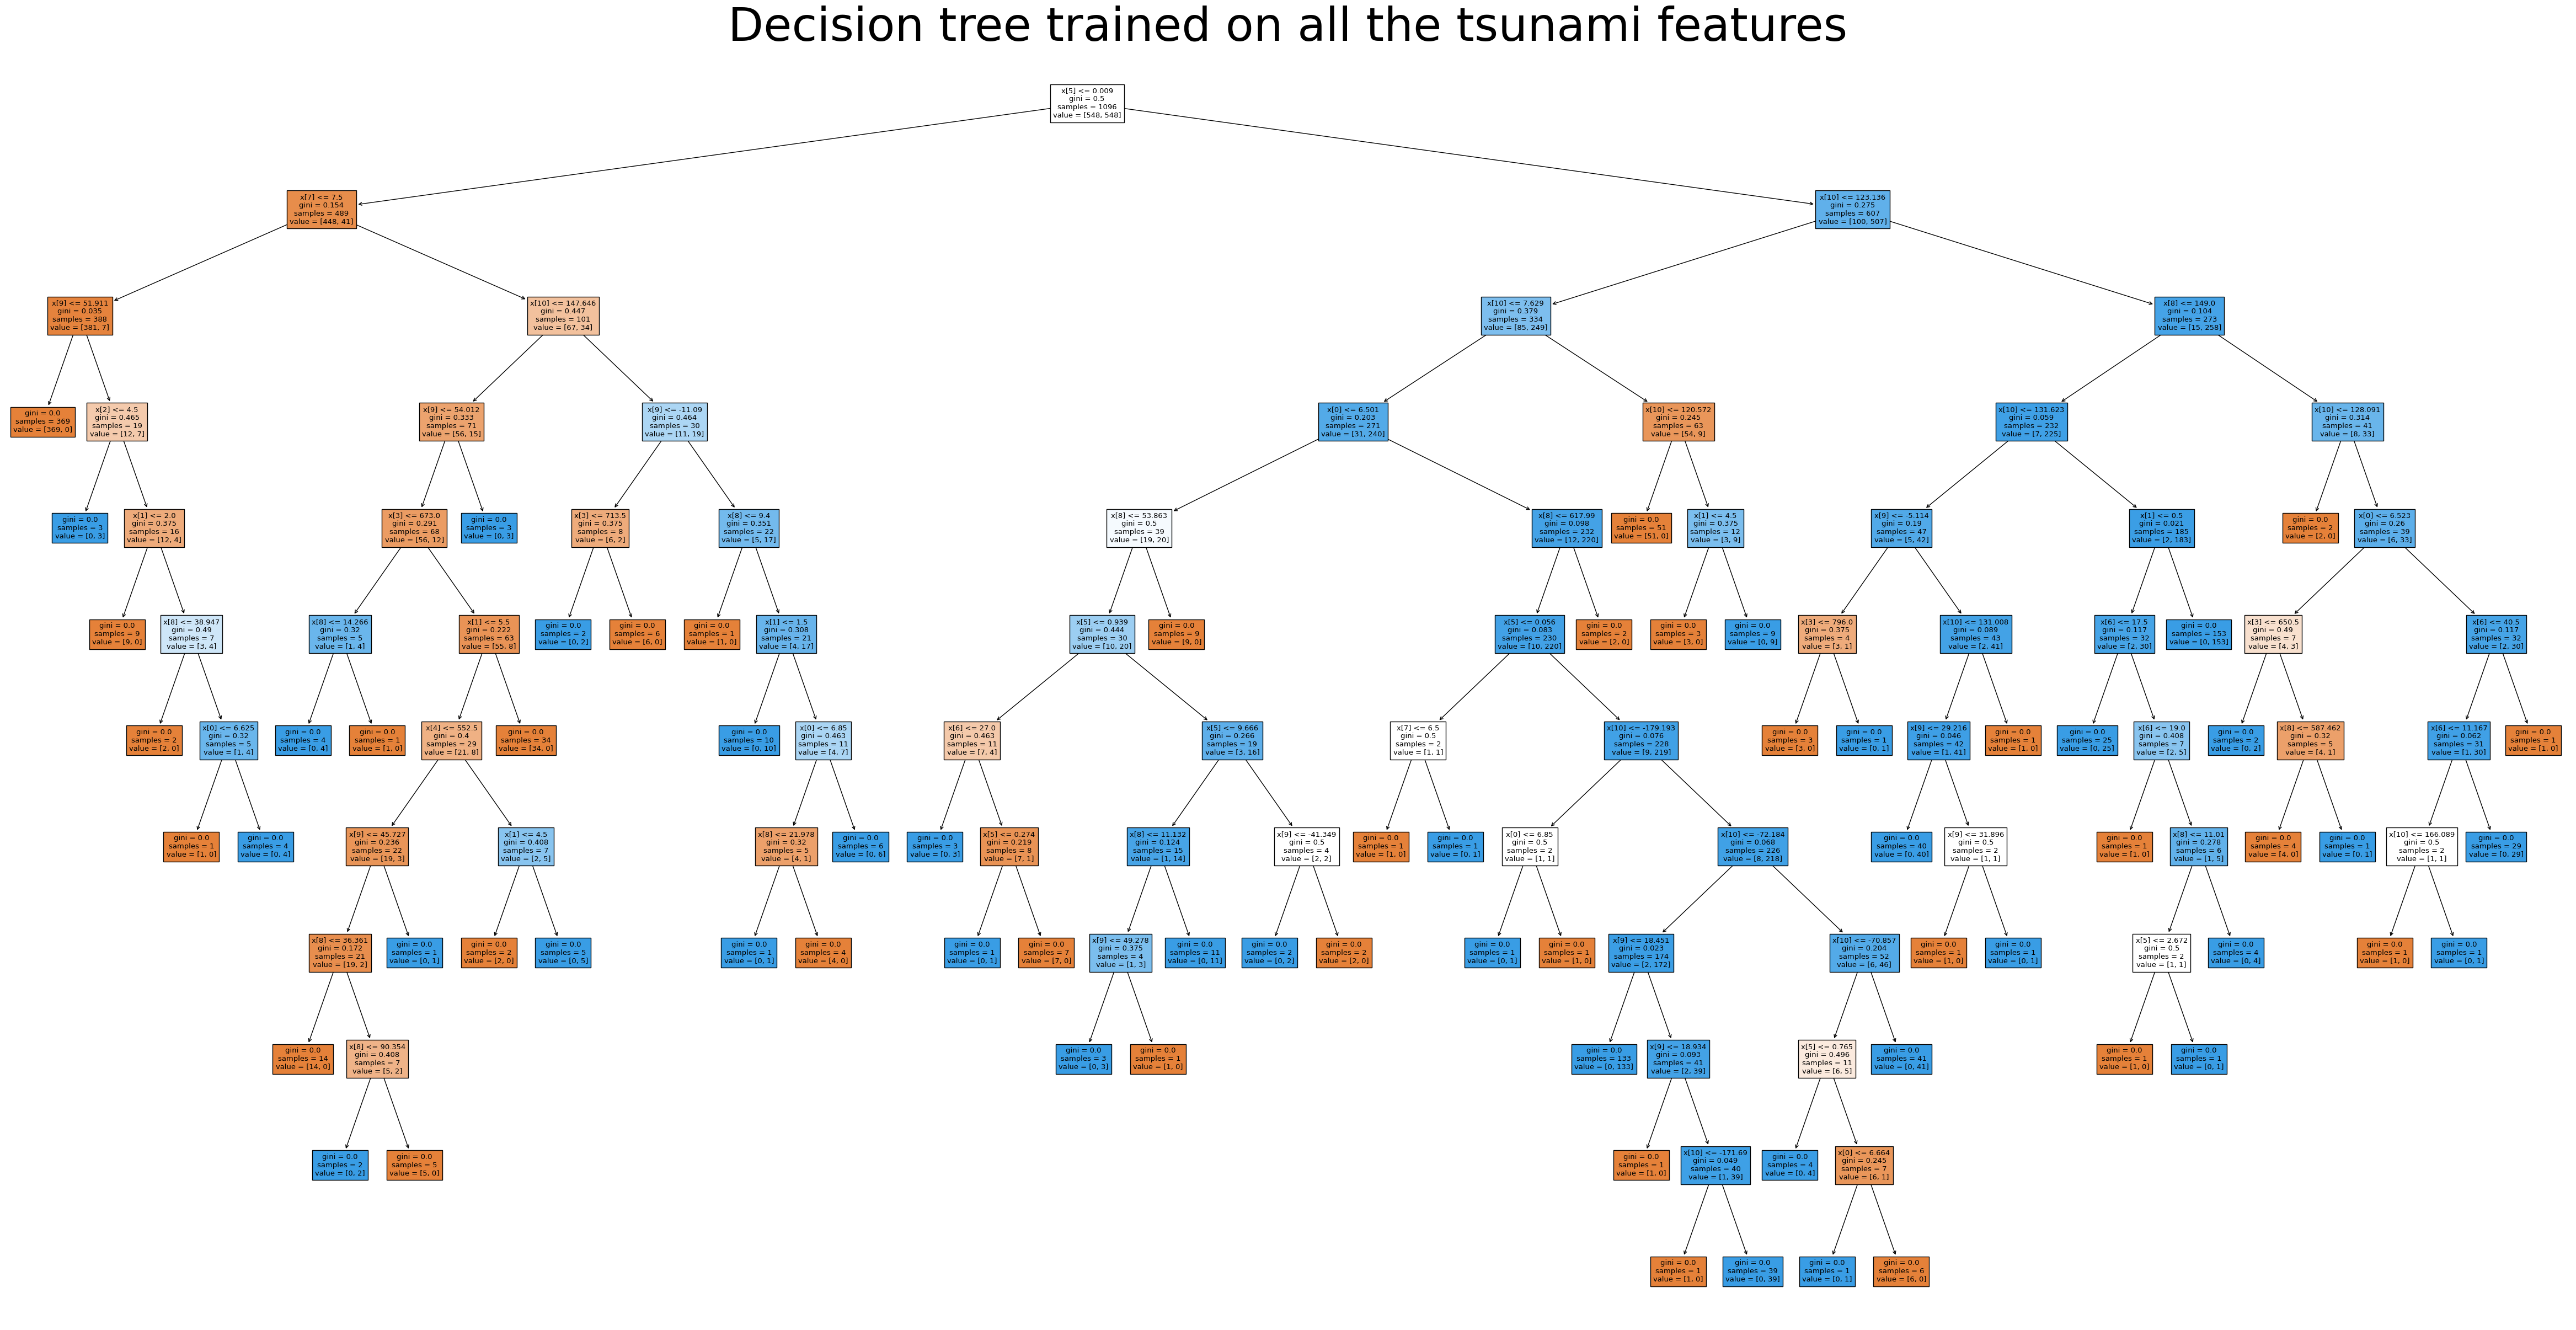

In [276]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60, 30))
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the tsunami features", fontsize = 60)
plt.show()

# 7. Interpretation

In [277]:
import shap

In [278]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

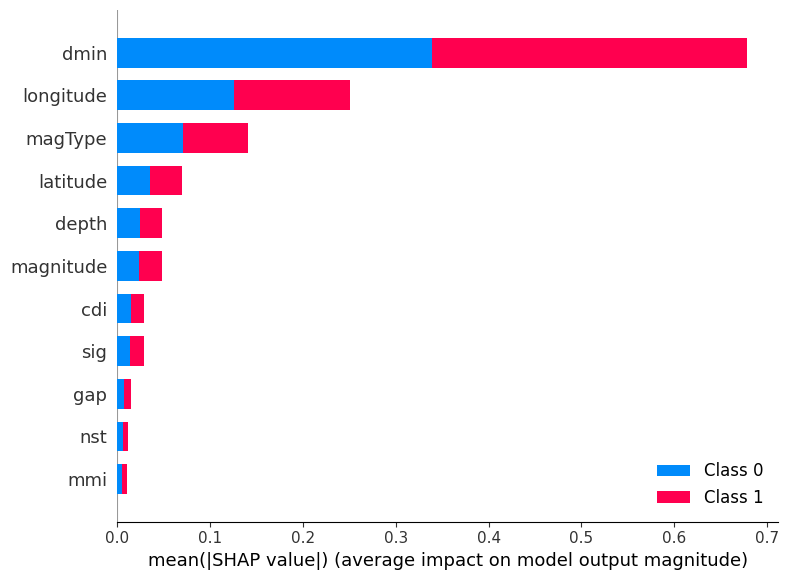

In [279]:
shap.summary_plot(shap_values, X_test)

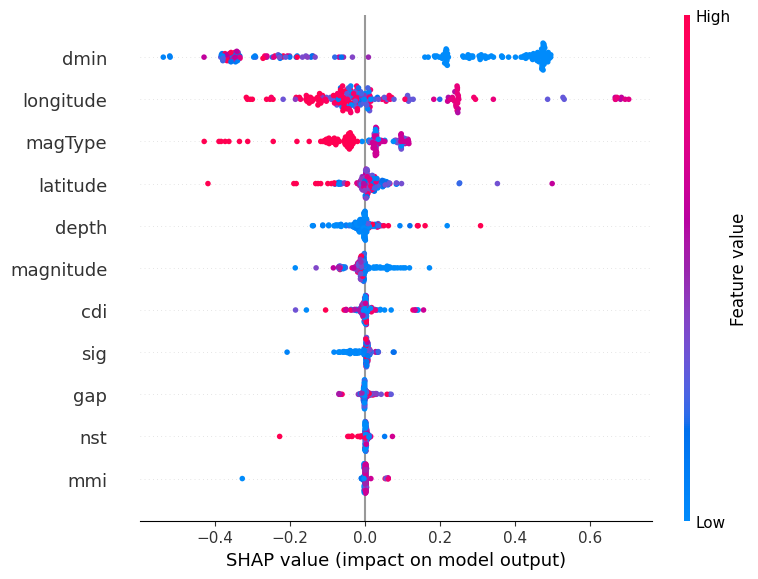

In [280]:
shap.summary_plot(shap_values[0], X_test)

In [281]:
# # for GNB
# clf1 = GaussianNB()
# clf1.fit(X_train, y_train)
# explainer = shap.Explainer(clf1.predict, X_train)